In [2]:
import numpy as np
import pandas as pd
import time

In [3]:
import datetime
import matplotlib.pyplot as plt

In [4]:
period1 = int(time.mktime(datetime.datetime(2020, 7, 18, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 7, 17, 23, 59).timetuple()))
interval = '1d' # 1d, 1m



In [5]:
query_string=f'https://query1.finance.yahoo.com/v7/finance/download/TATAELXSI.NS?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

In [6]:
df=pd.read_csv(query_string)

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-20,921.599976,926.250000,911.049988,921.799988,911.298706,245501
1,2020-07-21,928.000000,952.349976,918.000000,921.299988,910.804382,1511113
2,2020-07-22,931.000000,940.000000,908.000000,914.849976,904.427856,417969
3,2020-07-23,917.700012,923.799988,910.099976,913.549988,903.142639,215922
4,2020-07-24,909.900024,913.900024,901.000000,907.700012,897.359375,219181
...,...,...,...,...,...,...,...
493,2022-07-11,7948.000000,8120.000000,7815.649902,8046.000000,8046.000000,242078
494,2022-07-12,8000.000000,8075.000000,7933.000000,7958.000000,7958.000000,149473
495,2022-07-13,8004.000000,8017.899902,7685.000000,7711.399902,7711.399902,307560
496,2022-07-14,7777.899902,7844.950195,7636.000000,7799.549805,7799.549805,352503


In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-20,921.599976,926.250000,911.049988,921.799988,911.298706,245501
1,2020-07-21,928.000000,952.349976,918.000000,921.299988,910.804382,1511113
2,2020-07-22,931.000000,940.000000,908.000000,914.849976,904.427856,417969
3,2020-07-23,917.700012,923.799988,910.099976,913.549988,903.142639,215922
4,2020-07-24,909.900024,913.900024,901.000000,907.700012,897.359375,219181


In [9]:
df=df.set_index(pd.DatetimeIndex(df['Date'].values))

In [10]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-07-20,2020-07-20,921.599976,926.250000,911.049988,921.799988,911.298706,245501
2020-07-21,2020-07-21,928.000000,952.349976,918.000000,921.299988,910.804382,1511113
2020-07-22,2020-07-22,931.000000,940.000000,908.000000,914.849976,904.427856,417969
2020-07-23,2020-07-23,917.700012,923.799988,910.099976,913.549988,903.142639,215922
2020-07-24,2020-07-24,909.900024,913.900024,901.000000,907.700012,897.359375,219181
...,...,...,...,...,...,...,...
2022-07-11,2022-07-11,7948.000000,8120.000000,7815.649902,8046.000000,8046.000000,242078
2022-07-12,2022-07-12,8000.000000,8075.000000,7933.000000,7958.000000,7958.000000,149473
2022-07-13,2022-07-13,8004.000000,8017.899902,7685.000000,7711.399902,7711.399902,307560
2022-07-14,2022-07-14,7777.899902,7844.950195,7636.000000,7799.549805,7799.549805,352503


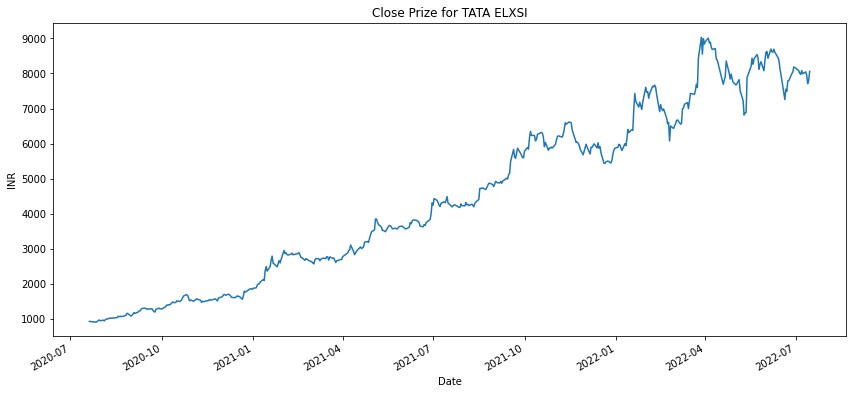

In [11]:
df['Close'].plot(figsize=(14.2,6.4))
plt.title('Close Prize for TATA ELXSI')
plt.ylabel('INR')
plt.xlabel('Date')
plt.show()

In [12]:
def DEMA(data,time_period,column):
    EMA=data[column].ewm(span=time_period, adjust=False).mean()
    DEMA=2*EMA -EMA.ewm(span=time_period, adjust=False).mean()
    return DEMA

In [13]:
df['DEMA_short']= DEMA(df,20,'Close')
df['DEMA_long']= DEMA(df,50,'Close')

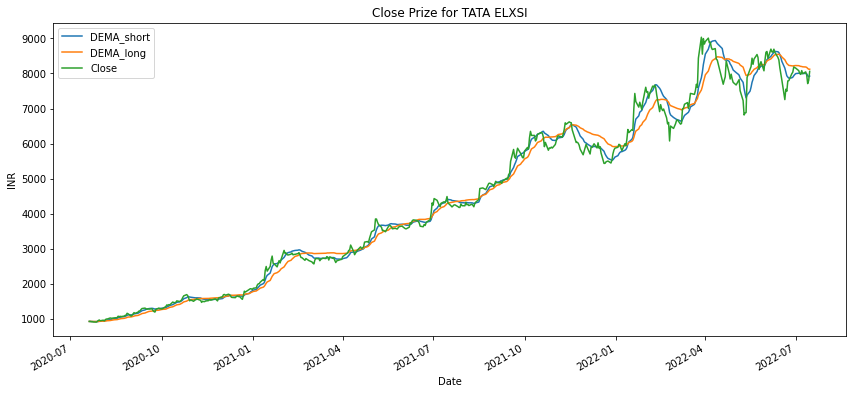

In [14]:
column_list=['DEMA_short','DEMA_long','Close']
df[column_list].plot(figsize=(14.2,6.4))
plt.title('Close Prize for TATA ELXSI')
plt.ylabel('INR')
plt.xlabel('Date')
plt.show()


In [15]:
def DEMA_strategy(data):
    buy_list=[]
    sell_list=[]
    flag=False
    for i in range(0,len(data)):
     if data['DEMA_short'][i]> data['DEMA_long'][i] and flag==False:
        buy_list.append(data['Close'][i])
        sell_list.append(np.nan)
        flag=True
     elif data['DEMA_short'][i]< data['DEMA_long'][i] and flag==True:
        buy_list.append(np.nan)
        sell_list.append(data['Close'][i])
        flag=False
     else:
         buy_list.append(np.nan)
         sell_list.append(np.nan)
        
    data['Buy']=buy_list
    data['Sell']=sell_list
    

In [16]:
DEMA_strategy(df)

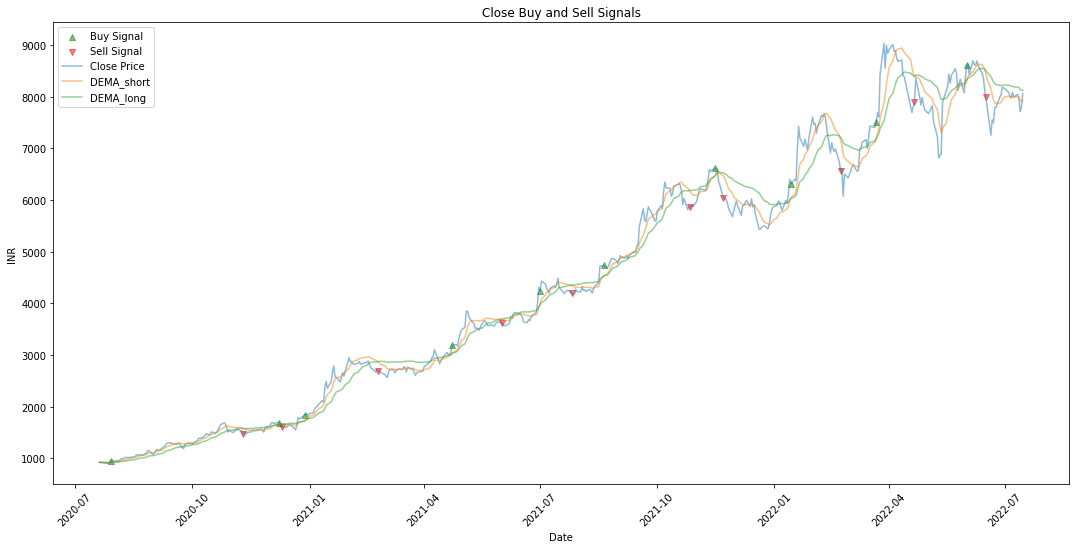

In [17]:
plt.figure(figsize=(18.2,8.5))
plt.scatter(df.index, df['Buy'], color='green', label='Buy Signal', marker='^',alpha=0.5)
plt.scatter(df.index, df['Sell'], color='red', label='Sell Signal', marker='v',alpha=0.5)
plt.plot(df['Close'],label='Close Price',alpha=0.5)
plt.plot(df['DEMA_short'],label='DEMA_short',alpha=0.5)
plt.plot(df['DEMA_long'],label='DEMA_long',alpha=0.5)
plt.xticks(rotation=45)
plt.title('Close Buy and Sell Signals')
plt.ylabel('INR')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()
